In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data
 
# input, 784개의 값을 가지며 n개의 이미지이다.
X = tf.placeholder(tf.float32, [None,784]) 
# input 을 이미지로 인식하기 위해 reshape을 해준다. 28*28의 이미지이며 단일색상, 개수는 n개이므로 -1
X_img = tf.reshape(X, [-1,28,28,1]) 
# output
Y = tf.placeholder(tf.float32, [None,10]) 
 
# layer 1
# 3*3크기의 필터, 색상은 단일, 총 32개의 필터
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.1)) 
# conv2d 를 통과해도 28*28 크기를 가짐, 대신 32개의 필터이므로 총 32개의 결과가 생김
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME') 
L1 = tf.nn.relu(L1)
# max pooling을 하고 나면 스트라이드 및 패딩 설정에 의해 14*14크기의 결과가 나옴
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 

# layer 2
# 이번에는 64개의 필터
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.1))
# conv2d layer를 통과시키면, [?,14,14,64] 형태를 가짐
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
# max pooling 에서 stride가 2 이므로, 결과는 7 * 7 형태를 가질 
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# 이후 쭉 펼친다.
L2 = tf.reshape(L2, [-1,7 * 7 * 64])

# fully-connected layer
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)


# init
sess = tf.Session()
sess.run(tf.global_variables_initializer())
mnist = input_data.read_data_sets("~/deep_learning_zeroToAll/", one_hot=True)
training_epochs = 15
batch_size = 100
 
# train
print('Learning started. It takes sometimes.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run([cost,optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d"%(epoch + 1),"cost =","{:.9f}".format(avg_cost))
print('Learning Finished!')
 
# Test
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:',sess.run(accuracy,feed_dict={X: mnist.test.images, Y:mnist.test.labels}))



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ~/deep_learning_zeroToAll/train-images-idx3-ub

(3, 3, 1)


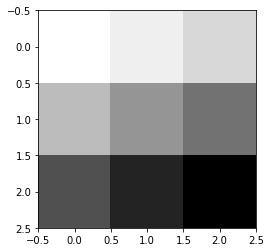

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()
image = np.array([
                  [[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')